# BFS

BFS could be used to find the shortest path between 2 vertices

- use a queue to track all adjacent nodes of current node
- maitain visited list to mark which node has been visited

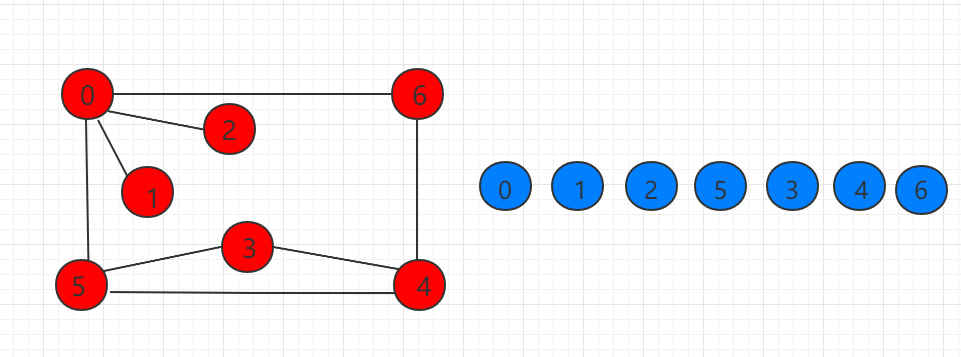

In [1]:
import numpy as np

class GraphMatrix():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed        
        self.graph = np.zeros((V, V))
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        self.graph[src, desc] = 1
        self.E = self.E + 1
        
        if not self.directed:
            self.graph[desc, src] = 1
        
    def has_edge(self, src, desc):
        return self.graph[src, desc]
    
    # BFS uses a queue to track all adjacency nodes
    def bfs(self, src):
        result = []
        q = []
        visited = [False] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            result.append(idx)
            
            for n_idx in range(self.V):
                if n_idx != idx and self.graph[idx, n_idx] == 1:
                    if not visited[n_idx]:
                        q.append(n_idx)
                        visited[n_idx] = True
        return result
    
    # different from BFS, which put adjacent node into the queue
    # this algo put the complete path, from src to the adjacent node, into the queue
    # everythime the queue pops the complete path to the adjacent node
    def get_shortest_path(self, src, desc):
        q = []
        visited = [False] * self.V
        
        q.append([src])
        visited[src] = True
        
        while q:
            current_path = q.pop(0)
            idx = current_path[-1]
            if idx == desc:
                return current_path
            
            for n_idx in range(self.V):
                if n_idx != idx and self.graph[idx, n_idx] == 1:
                    if not visited[n_idx]:
                        new_path = current_path + [n_idx]
                        q.append(new_path)
                        visited[n_idx] = True
        return []
    
    # it conducts BFS, while maintain a list
    # index i of the list, represent vertex i
    # list[i], the value, indicates from which vertex we arrive vertex i
    # e.g. in [2, 1, 0, 3]:
    # first element (idx=0, val=2) comes from element idx 2
    # then third element (idx=2, val=0) comes from element idx 0. we found a loop!
    def get_shortest_path_save_space(self, src, desc):
        q = []
        visited = [False] * self.V
        index_node_from_value_node = [-1] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            
            if idx == desc:
                break
                
            for n_idx in range(self.V):
                if n_idx != idx and self.graph[idx, n_idx] == 1:
                    if not visited[n_idx]:
                        index_node_from_value_node[n_idx] = idx
                        q.append(n_idx)
                        visited[n_idx] = True
                        
        result = []
        result.insert(0, desc)
        prev = index_node_from_value_node[desc]
        while prev != -1:
            result.insert(0, prev)
            prev = index_node_from_value_node[prev]
        return result
        
    
g = GraphMatrix(7)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 5)
g.add_edge(0, 6)
g.add_edge(3, 4)
g.add_edge(3, 5)
g.add_edge(4, 5)
g.add_edge(4, 6)
print(g.graph)
print("===========")
print(f"Result of bfs(0): {g.bfs(0)}")
print("===========")
print(f"Result of get_shortest_path(2, 6): {g.get_shortest_path(2, 6)}")
print("===========")
print(f"Result of get_shortest_path_save_space(2, 6): {g.get_shortest_path_save_space(2, 6)}")

[[0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0.]]
Result of bfs(0): [0, 1, 2, 5, 6, 3, 4]
Result of get_shortest_path(2, 6): [2, 0, 6]
Result of get_shortest_path_save_space(2, 6): [2, 0, 6]


In [2]:
from collections import defaultdict

class GraphDynamicList():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed
        self.graph = defaultdict(list)
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        self.graph[src].append(desc)
        self.E = self.E + 1
        
        if not self.directed:
            self.graph[desc].append(src)
        
    def has_edge(self, src, desc):
        return desc in self.graph[src]
    
    def bfs(self, src):
        result = []
        q = []
        visited = [False] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            result.append(idx)
            
            for n_idx in self.graph[idx]:
                if not visited[n_idx]:
                    q.append(n_idx)
                    visited[n_idx] = True
                    
        return result
        
    # different from BFS, which put adjacent node into the queue
    # this algo put the complete path, from src to the adjacent node, into the queue
    # everythime the queue pops the complete path to the adjacent node
    def get_shortest_path(self, src, desc):
        q = []
        visited = [False] * self.V
        
        q.append([src])
        visited[src] = True
        
        while q:
            current_path = q.pop(0)
            idx = current_path[-1]
            if idx == desc:
                return current_path
            
            for n_idx in self.graph[idx]:
                if not visited[n_idx]:
                    new_path = current_path + [n_idx]
                    q.append(new_path)
                    visited[n_idx] = True
                    
        return []
    
    # it conducts BFS, while maintain a list
    # index i of the list, represent vertex i
    # list[i], the value, indicates from which vertex we arrive vertex i
    # e.g. in [2, 1, 0, 3]:
    # first element (idx=0, val=2) comes from element idx 2
    # then third element (idx=2, val=0) comes from element idx 0. we found a loop!
    def get_shortest_path_save_space(self, src, desc):
        q = []
        visited = [False] * self.V
        index_node_from_value_node = [-1] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            if idx == desc:
                break
            
            for n_idx in self.graph[idx]:
                if not visited[n_idx]:
                    index_node_from_value_node[n_idx] = idx
                    q.append(n_idx)
                    visited[n_idx] = True
                    
        result = [desc]
        prev = index_node_from_value_node[desc]
        while prev != -1:
            result.insert(0, prev)
            prev = index_node_from_value_node[prev]
                    
        return result
    
g = GraphDynamicList(7)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 5)
g.add_edge(0, 6)
g.add_edge(3, 4)
g.add_edge(3, 5)
g.add_edge(4, 5)
g.add_edge(4, 6)
print(g.graph)
print("===========")
print(f"Result of bfs(0): {g.bfs(0)}")
print("===========")
print(f"Result of get_shortest_path(2, 6): {g.get_shortest_path(2, 6)}")
print("===========")
print(f"Result of get_shortest_path_save_space(2, 6): {g.get_shortest_path_save_space(2, 6)}")

defaultdict(<class 'list'>, {0: [1, 2, 5, 6], 1: [0], 2: [0], 5: [0, 3, 4], 6: [0, 4], 3: [4, 5], 4: [3, 5, 6]})
Result of bfs(0): [0, 1, 2, 5, 6, 3, 4]
Result of get_shortest_path(2, 6): [2, 0, 6]
Result of get_shortest_path_save_space(2, 6): [2, 0, 6]


In [3]:
class Node():
    def __init__(self, idx):
        self.idx = idx
        self.next = None
        
class GraphLinkedList():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed
        self.graph = [None] * V
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        
        # new node point to head
        node = Node(desc)
        node.next = self.graph[src]
        # let new node be the head
        self.graph[src] = node
        
        self.E = self.E + 1
        
        if not self.directed:
            node = Node(src)
            node.next = self.graph[desc]
            self.graph[desc] = node
        
    def has_edge(self, src, desc):
        node = self.graph[src]
        while node:
            if node.idx == desc:
                return True
            node = node.next
        return False
    
    def print_graph(self):
        for idx, node in enumerate(self.graph):
            print(f"Vertex {idx}: ", end="")
            neighbours = []
            while node:
                neighbours.append(str(node.idx))
                node = node.next
            print("->".join(neighbours))
            
    def bfs(self, src):
        result = []
        q = []
        visited = [False] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            result.append(idx)
            
            node = self.graph[idx]
            while node:
                if not visited[node.idx]:
                    q.append(node.idx)
                    visited[node.idx] = True
                node = node.next
                    
        return result
    
    def get_shortest_path(self, src, desc):
        q = []
        visited = [False] * self.V
        
        q.append([src])
        visited[src] = True
        
        while q:
            current_path = q.pop(0)
            idx = current_path[-1]
            
            if idx == desc:
                return current_path
            
            node = self.graph[idx]
            while node:
                if not visited[node.idx]:
                    new_path = current_path + [node.idx]
                    q.append(new_path)
                    visited[node.idx] = True
                node = node.next
        
        return []
    
    def get_shortest_path_save_space(self, src, desc):
        q = []
        visited = [False] * self.V
        index_node_from_value_node = [-1] * self.V
        
        q.append(src)
        visited[src] = True
        
        while q:
            idx = q.pop(0)
            if idx == desc:
                break
            
            node = self.graph[idx]
            while node:
                if not visited[node.idx]:
                    index_node_from_value_node[node.idx] = idx
                    q.append(node.idx)
                    visited[node.idx] = True
                node = node.next
                
        result = [desc]
        prev = index_node_from_value_node[desc]
        while prev != -1:
            result.insert(0, prev)
            prev = index_node_from_value_node[prev]
            
        return result
            
g = GraphLinkedList(7)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 5)
g.add_edge(0, 6)
g.add_edge(3, 4)
g.add_edge(3, 5)
g.add_edge(4, 5)
g.add_edge(4, 6)
g.print_graph()
print("===========")
print(f"Result of bfs(0): {g.bfs(0)}")
print("===========")
print(f"Result of get_shortest_path(2, 6): {g.get_shortest_path(2, 6)}")
print("===========")
print(f"Result of get_shortest_path_save_space(2, 6): {g.get_shortest_path_save_space(2, 6)}")

Vertex 0: 6->5->2->1
Vertex 1: 0
Vertex 2: 0
Vertex 3: 5->4
Vertex 4: 6->5->3
Vertex 5: 4->3->0
Vertex 6: 4->0
Result of bfs(0): [0, 6, 5, 2, 1, 4, 3]
Result of get_shortest_path(2, 6): [2, 0, 6]
Result of get_shortest_path_save_space(2, 6): [2, 0, 6]
